In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv('data_titanic.xls')

In [3]:
train.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [4]:
## missing data

train.isnull()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

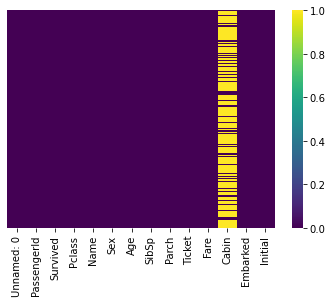

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

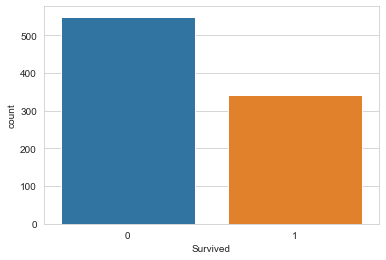

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

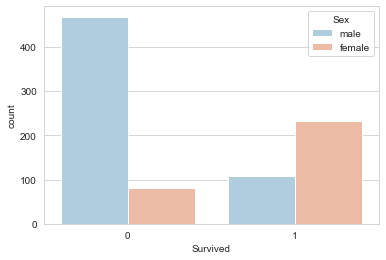

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data=train, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

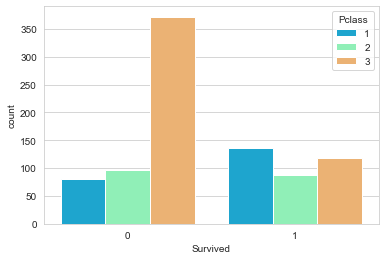

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass', data=train, palette='rainbow')

C:\Users\Pallavi\anaconda3dekstop\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

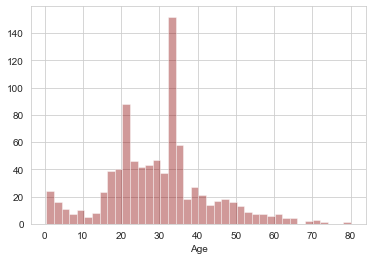

In [9]:
sns.distplot(train['Age'].dropna(), kde=False,color='darkred',bins=40)

<AxesSubplot:>

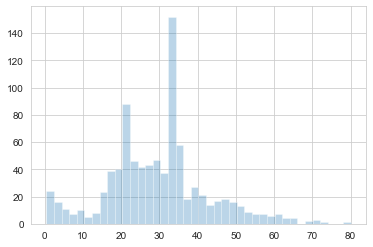

In [10]:
train['Age'].hist(bins=40,alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

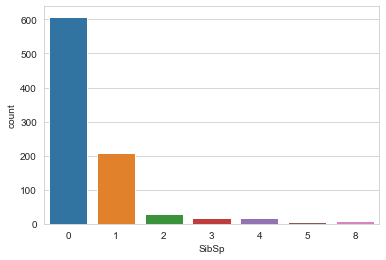

In [11]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

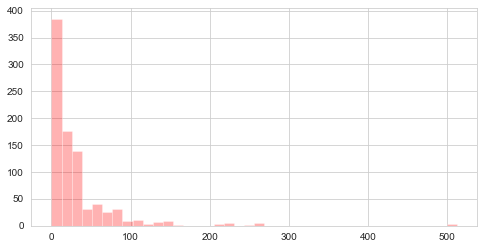

In [12]:
train['Fare'].hist(color='red', bins=40,alpha=0.3,figsize=(8,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

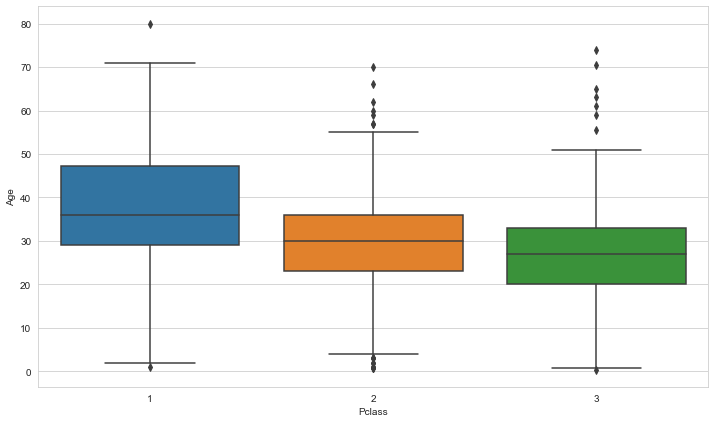

In [13]:
##Data cleaning
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [14]:
def impute_age(cols):
    
    Age=cols[0]
    Pclass=cols[1]
    
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
        
        
    else:
        return Age
            

In [15]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

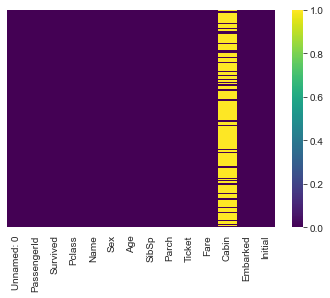

In [16]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [17]:
train.drop('Cabin',axis=1,inplace=True)

In [18]:
train.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


<AxesSubplot:>

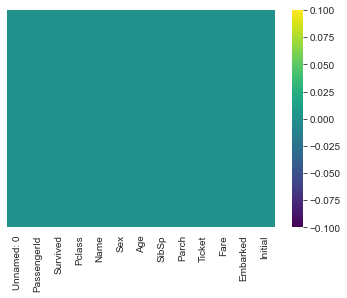

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          891 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Embarked     891 non-null    object 
 12  Initial      891 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [21]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [22]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embarked=pd.get_dummies(train['Embarked'],drop_first=True)
initial=pd.get_dummies(train['Initial'],drop_first=True)

In [23]:
train.drop(['Sex', 'Name', 'Embarked', 'Ticket','Initial'],axis=1,inplace=True)

In [24]:
train.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,3,22.0,1,0,7.2500
1,1,2,1,1,38.0,1,0,71.2833
2,2,3,1,3,26.0,0,0,7.9250
3,3,4,1,1,35.0,1,0,53.1000
4,4,5,0,3,35.0,0,0,8.0500


In [33]:
train=pd.concat([train,sex,embarked,initial],axis=1)

In [34]:
train.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S,Miss,Mr,Mrs,Other
0,0,1,0,3,22.0,1,0,7.2500,1,0,1,1,0,1,0,1,0,0
1,1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,1,0
2,2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,1,1,0,0,0
3,3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0,1,0
4,4,5,0,3,35.0,0,0,8.0500,1,0,1,1,0,1,0,1,0,0


In [35]:
train.drop('Survived',axis=1).head()

,Unnamed: 0,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S,Miss,Mr,Mrs,Other
0,0,1,3,22.0,1,0,7.2500,1,0,1,1,0,1,0,1,0,0
1,1,2,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,1,0
2,2,3,3,26.0,0,0,7.9250,0,0,1,0,0,1,1,0,0,0
3,3,4,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0,1,0
4,4,5,3,35.0,0,0,8.0500,1,0,1,1,0,1,0,1,0,0


In [36]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test= train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.20, random_state=101)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logmodel= LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Pallavi\anaconda3dekstop\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
predictions= logmodel.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
accuracy=confusion_matrix(y_test,predictions)

In [46]:
accuracy

array([[90,  9],
       [23, 57]], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8212290502793296

In [49]:
predictions

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0], dtype=int64)